## Wine Ontology

In [1]:
import networkx as nx

# Define wines
wines = ['Cabernet Sauvignon', 'Chardonnay', 'Merlot', 'Pinot Noir', 
         'Sauvignon Blanc', 'Riesling', 'Malbec', 'Champagne']

# Define wine types and food pairings
wine_details = [
    ('Cabernet Sauvignon', 'Red', ['Steaks', 'Dark chocolate']),
    ('Chardonnay', 'White', ['Chicken', 'Seafood','Spicy food']),
    ('Merlot', 'Red', ['Beef', 'Lamb']),
    ('Pinot Noir', 'Red', ['Mushrooms', 'Salmon']),
    ('Sauvignon Blanc', 'White', ['Salads', 'Seafood']),
    ('Riesling', 'White', ['Salads','Spicy food']),
    ('Malbec', 'Red', ['BBQ', 'Cheese']),
    ('Champagne', 'Sparkling White', ['Oysters', 'Caviar'])
]

# Create dictionaries to store wine details and types
wine_dict = {i: (wine, wine_type, food_pairing) for i, (wine, wine_type, food_pairing) in enumerate(wine_details)}
type_dict = {i: wine_type for i, (wine, wine_type, _) in enumerate(wine_details)}

In [2]:
# Initialize graph for wines
wine_g = nx.DiGraph()

# Add wine nodes with their attributes
for wine_id, (wine_name, wine_type, food_pairing) in wine_dict.items():
    attributes = {
        'wine_id': wine_id,
        'name': wine_name,
        'type': wine_type,
        'food_pairing': food_pairing
    }
    wine_node_name = f"Wine_{wine_id}"
    wine_g.add_node(wine_node_name, **attributes)

# Add wine type nodes
type_set = {}
for type_id, (_, wine_type, _) in enumerate(wine_details):
    if wine_type not in type_set:
        type_attributes = {
            'type_id': len(type_set),
            'type': wine_type
        }
        type_node_name = f"Type_{len(type_set)}"
        wine_g.add_node(type_node_name, **type_attributes)
        type_set[wine_type] = type_node_name

    # Connect each wine to its type node
    wine_node_name = f"Wine_{type_id}"
    type_node_name = type_set[wine_type]
    wine_g.add_edge(wine_node_name, type_node_name)

# Add food pairings as separate nodes and connect them
food_pairing_set = {}
for wine_id, (_, _, food_pairing) in wine_dict.items():
    for food in food_pairing:
        if food not in food_pairing_set:
            food_pairing_attributes = {
                'food_name': food
            }
            food_pairing_node_name = f"Food_{food_pairing_set.get(food, len(food_pairing_set))}"
            wine_g.add_node(food_pairing_node_name, **food_pairing_attributes)
            food_pairing_set[food] = food_pairing_node_name
        
        # Connect wine to its food pairing node
        wine_node_name = f"Wine_{wine_id}"
        food_pairing_node_name = food_pairing_set[food]
        wine_g.add_edge(wine_node_name, food_pairing_node_name)


In [3]:
# Print the structure of the graph
print("Nodes and their attributes:")
for node in wine_g.nodes(data=True):
    print(node)

Nodes and their attributes:
('Wine_0', {'wine_id': 0, 'name': 'Cabernet Sauvignon', 'type': 'Red', 'food_pairing': ['Steaks', 'Dark chocolate']})
('Wine_1', {'wine_id': 1, 'name': 'Chardonnay', 'type': 'White', 'food_pairing': ['Chicken', 'Seafood', 'Spicy food']})
('Wine_2', {'wine_id': 2, 'name': 'Merlot', 'type': 'Red', 'food_pairing': ['Beef', 'Lamb']})
('Wine_3', {'wine_id': 3, 'name': 'Pinot Noir', 'type': 'Red', 'food_pairing': ['Mushrooms', 'Salmon']})
('Wine_4', {'wine_id': 4, 'name': 'Sauvignon Blanc', 'type': 'White', 'food_pairing': ['Salads', 'Seafood']})
('Wine_5', {'wine_id': 5, 'name': 'Riesling', 'type': 'White', 'food_pairing': ['Salads', 'Spicy food']})
('Wine_6', {'wine_id': 6, 'name': 'Malbec', 'type': 'Red', 'food_pairing': ['BBQ', 'Cheese']})
('Wine_7', {'wine_id': 7, 'name': 'Champagne', 'type': 'Sparkling White', 'food_pairing': ['Oysters', 'Caviar']})
('Type_0', {'type_id': 0, 'type': 'Red'})
('Type_1', {'type_id': 1, 'type': 'White'})
('Type_2', {'type_id': 2

In [4]:
print("Edges:")
for edge in wine_g.edges():
    print(edge)

Edges:
('Wine_0', 'Type_0')
('Wine_0', 'Food_0')
('Wine_0', 'Food_1')
('Wine_1', 'Type_1')
('Wine_1', 'Food_2')
('Wine_1', 'Food_3')
('Wine_1', 'Food_4')
('Wine_2', 'Type_0')
('Wine_2', 'Food_5')
('Wine_2', 'Food_6')
('Wine_3', 'Type_0')
('Wine_3', 'Food_7')
('Wine_3', 'Food_8')
('Wine_4', 'Type_1')
('Wine_4', 'Food_9')
('Wine_4', 'Food_3')
('Wine_5', 'Type_1')
('Wine_5', 'Food_9')
('Wine_5', 'Food_4')
('Wine_6', 'Type_0')
('Wine_6', 'Food_10')
('Wine_6', 'Food_11')
('Wine_7', 'Type_2')
('Wine_7', 'Food_12')
('Wine_7', 'Food_13')


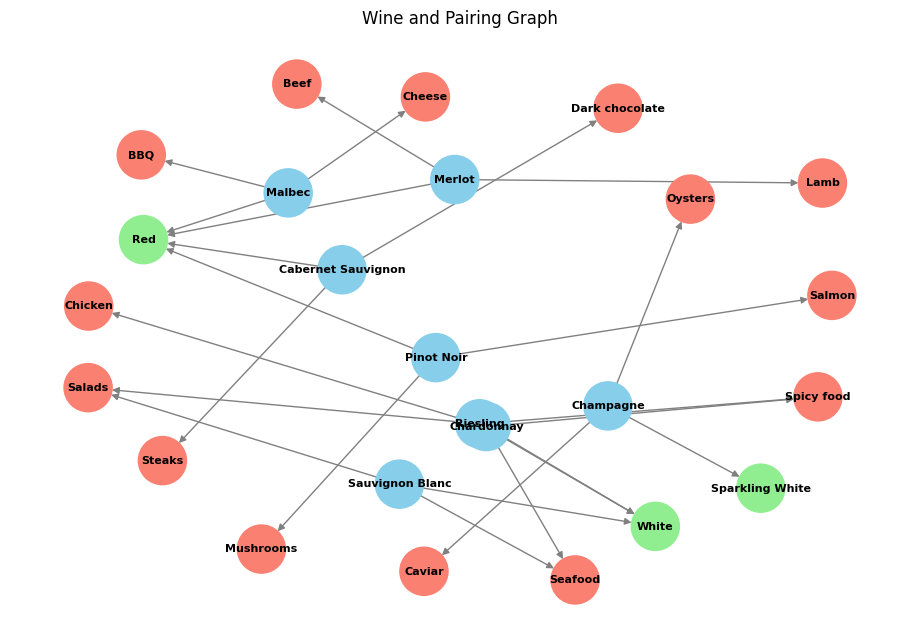

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

# Initialize graph for wines
wine_g = nx.DiGraph()

# Add wine nodes with their attributes
for wine_id, (wine_name, wine_type, food_pairing) in wine_dict.items():
    attributes = {
        'wine_id': wine_id,
        'name': wine_name,
        'type': wine_type,
        'food_pairing': food_pairing
    }
    wine_node_name = f"Wine_{wine_id}"
    wine_g.add_node(wine_node_name, **attributes, category='wine')

# Add wine type nodes
type_set = {}
for type_id, (_, wine_type, _) in enumerate(wine_details):
    if wine_type not in type_set:
        type_attributes = {
            'type_id': len(type_set),
            'type': wine_type
        }
        type_node_name = f"Type_{len(type_set)}"
        wine_g.add_node(type_node_name, **type_attributes, category='type')
        type_set[wine_type] = type_node_name

    # Connect each wine to its type node
    wine_node_name = f"Wine_{type_id}"
    type_node_name = type_set[wine_type]
    wine_g.add_edge(wine_node_name, type_node_name)

# Add food pairings as separate nodes and connect them
food_pairing_set = {}
for wine_id, (_, _, food_pairing) in wine_dict.items():
    for food in food_pairing:
        if food not in food_pairing_set:
            food_pairing_attributes = {
                'food_name': food
            }
            food_pairing_node_name = f"Food_{food_pairing_set.get(food, len(food_pairing_set))}"
            wine_g.add_node(food_pairing_node_name, **food_pairing_attributes, category='food')
            food_pairing_set[food] = food_pairing_node_name
        
        # Connect wine to its food pairing node
        wine_node_name = f"Wine_{wine_id}"
        food_pairing_node_name = food_pairing_set[food]
        wine_g.add_edge(wine_node_name, food_pairing_node_name)

# Define colors for different categories
color_map = {
    'wine': 'skyblue',
    'type': 'lightgreen',
    'food': 'salmon'
}

# Apply node colors based on category
node_colors = [color_map[wine_g.nodes[node]['category']] for node in wine_g.nodes]

# Plot the graph
plt.figure(figsize=(9, 6))
pos = nx.spring_layout(wine_g, seed=42)

# Draw the nodes with category-based colors
nx.draw(wine_g, pos, node_color=node_colors, with_labels=False, node_size=1200, edge_color='gray')

# Create labels for the nodes
labels = {}
for node in wine_g.nodes():
    if node.startswith("Wine"):
        labels[node] = wine_g.nodes[node]['name']
    elif node.startswith("Type"):
        labels[node] = wine_g.nodes[node]['type']
    elif node.startswith("Food"):
        labels[node] = wine_g.nodes[node]['food_name']

# Draw the labels
nx.draw_networkx_labels(wine_g, pos, labels=labels, font_size=8, font_weight='bold', font_color='black')

plt.title('Wine and Pairing Graph')
plt.axis('off')
plt.show()

Query 1: Foods pairing with seafood

In [6]:
# Find wines that pair with a specific foood
search_food = 'Seafood'
seafood_pairings = [node for node, attrs in wine_g.nodes(data=True) if attrs.get('food_name') == search_food]
wines_with_seafood = []

# Check edges to find wines connected to "Seafood"
for seafood_node in seafood_pairings:
    for wine, food in wine_g.in_edges(seafood_node):
        if wine_g.nodes[wine].get('type') in ['Red', 'White', 'Sparkling White']:
            wines_with_seafood.append(wine_g.nodes[wine]['name'])

print("Wines that pair well with seafood:", wines_with_seafood)


Wines that pair well with seafood: ['Chardonnay', 'Sauvignon Blanc']


Query 2: List of all Red Wines

In [7]:
# Find all red wines by checking for nodes with type "Red"
wine_type = 'Red'
red_wines = []
for node in wine_g.nodes(data=True):
    if node[1].get('type') == wine_type and node[1].get('name'):
        red_wines.append(node[1]['name'])

print("List of all red wines:", red_wines)

List of all red wines: ['Cabernet Sauvignon', 'Merlot', 'Pinot Noir', 'Malbec']


Query 3: Recommend a wine based on maximum common features

In [8]:
# Find the target wine's attributes
target_wine = 'Riesling'
target_wine_details = next((attrs for node, attrs in wine_g.nodes(data=True) if attrs.get('name') == target_wine), None)

# Function to count common attributes between two wines
def count_common_attributes(wine_attrs1, wine_attrs2):
    common_count = 0
    
    if wine_attrs1['type'] == wine_attrs2['type']:
        common_count += 1
    
    # Check for common food pairings
    common_count += len(set(wine_attrs1.get('food_pairing', [])).intersection(wine_attrs2.get('food_pairing', [])))
    
    return common_count

# Find wines with the maximum common attributes
max_common = 0
recommended_wines = []

for node, attrs in wine_g.nodes(data=True):
    # Skip the target wine itself
    if attrs.get('name') != target_wine and 'name' in attrs:
        common_count = count_common_attributes(target_wine_details, attrs)
        
        # If we find a wine with more common attributes, update the list
        if common_count > max_common:
            max_common = common_count
            recommended_wines = [attrs['name']]
        elif common_count == max_common:
            recommended_wines.append(attrs['name'])

recommended_wines_str = ", ".join(recommended_wines)
print(f"If someone likes {target_wine}, we recommend {recommended_wines_str} as they are the most aasociated with it.")

If someone likes Riesling, we recommend Chardonnay, Sauvignon Blanc as they are the most aasociated with it.
